In [2]:
# -*- coding: utf-8 -*-

#### Allow the necessary imports to be installed

In [3]:

%%!
pip install --trusted-host pypi.org ipython-sql


['Requirement already satisfied: ipython-sql in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (0.3.9)',
 'Requirement already satisfied: prettytable in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (0.7.2)',
 'Requirement already satisfied: sqlparse in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (0.3.1)',
 'Requirement already satisfied: six in c:\\users\\andre\\appdata\\roaming\\python\\python37\\site-packages (from ipython-sql) (1.12.0)',
 'Requirement already satisfied: ipython-genutils>=0.1.0 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (0.2.0)',
 'Requirement already satisfied: ipython>=1.0 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (7.13.0)',
 'Requirement already satisfied: sqlalchemy>=0.6.7 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from ipython-sql) (1.3.16)',
 'Requirement already satisfied: prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0 in c:\\osgeo4~1\\apps\\python

In [4]:
%%!
pip install wget

['Requirement already satisfied: wget in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (3.2)',
 'WARNING: You are using pip version 20.0.2; however, version 20.1.1 is available.',
 "You should consider upgrading via the 'c:\\osgeo4~1\\bin\\python3.exe -m pip install --upgrade pip' command."]

In [5]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
#sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
#QgsApplication.setPrefixPath("/usr/local", True) 
from qgis.server import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice



qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
from IPython.display import Image

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/andre/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/andre/AppData/Roaming/python3\profiles\default/qgis-auth.db



# Code to Join two Layers (shp and csv) with a field in common

In [6]:
vectorLyr=QgsVectorLayer("C:/OSGeo4W64/bin/Andre/Covid-19Brazil/Tables/ShapesBrazil/lml_unidade_federacao_a.shp","Brasil","ogr")
vectorLyr.isValid()

uri='file:///C:/OSGeo4W64/bin/Andre/Covid-19Brazil/Tables/cases-brazil-total.csv?delimiter=,'
infoLyr=QgsVectorLayer(uri,'casosBrasil','delimitedtext')
infoLyr.isValid()

QgsProject.instance().addMapLayer(vectorLyr)
QgsProject.instance().addMapLayer(infoLyr)
csvField='state'
shpField='sigla'

joinObject=QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)
joinObject.setJoinLayerId(infoLyr.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(infoLyr)
vectorLyr.addJoin(joinObject)

vlayer = QgsProject.instance().mapLayersByName('Brasil')[0]

for field in vlayer.fields():
    print("Column "+field.name()+" Load")

Column nome Load
Column geometriaa Load
Column sigla Load
Column geocodigo Load
Column casosBrasil_country Load
Column casosBrasil_totalCases Load
Column casosBrasil_totalCasesMS Load
Column casosBrasil_notConfirmedByMS Load
Column casosBrasil_deaths Load
Column casosBrasil_deathsMS Load
Column casosBrasil_URL Load
Column casosBrasil_deaths_per_100k_inhabitants Load
Column casosBrasil_totalCases_per_100k_inhabitants Load
Column casosBrasil_deaths_by_totalCases Load
Column casosBrasil_recovered Load
Column casosBrasil_suspects Load
Column casosBrasil_tests Load
Column casosBrasil_tests_per_100k_inhabitants Load
Column casosBrasil_date Load
Column casosBrasil_newCases Load
Column casosBrasil_newDeaths Load


## Use Label (deaths) to show number of cases in Brazil per State

## Number of Deaths

In [7]:
from qgis.utils import iface


label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "casosBrasil_deaths"


text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setEnabled(False)
text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()



Gerar mapa com 1000 por 864


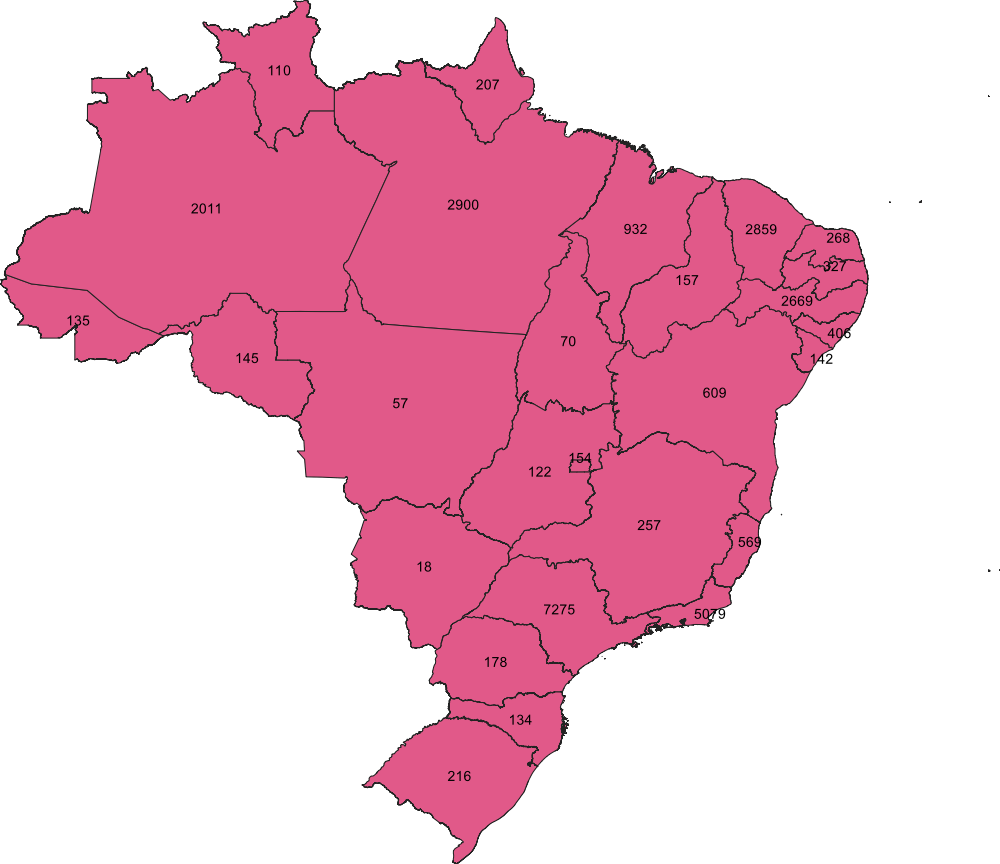

In [8]:
vlayer = QgsProject.instance().mapLayersByName('Brasil')[0]

xt = vlayer.extent()
# print(xt)
width  = 1000
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('fig/brasilDe.png',"PNG")
Image( imgbuf.data() )


# Number os tests per State

Gerar mapa com 1000 por 864


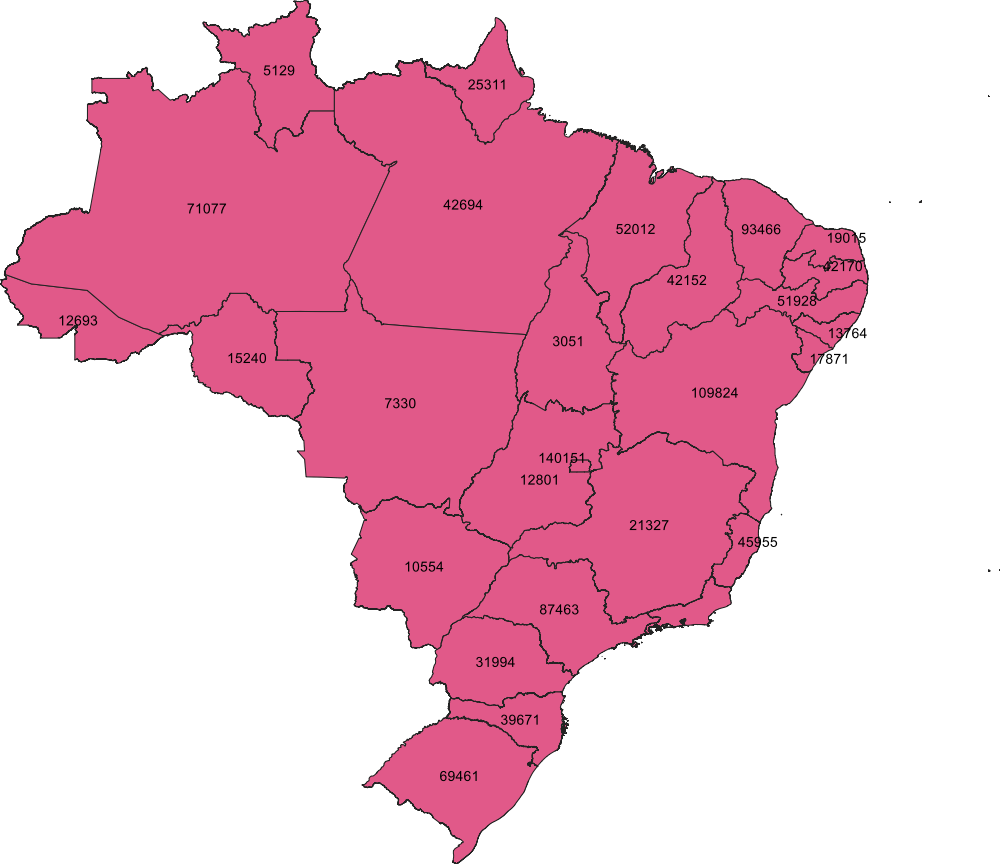

In [9]:
from qgis.utils import iface


label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "casosBrasil_tests"


text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setEnabled(False)
text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()

vlayer = QgsProject.instance().mapLayersByName('Brasil')[0]

xt = vlayer.extent()
# print(xt)
width  = 1000
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('fig/brasilTe.png',"PNG")
Image( imgbuf.data() )


In [12]:
from qgis.PyQt import QtGui

myVectorLayer = QgsProject.instance().mapLayersByName('Brasil')[0]

myTargetField = 'casosBrasil_tests'
myRangeList = []
myOpacity = 1
# Make our first symbol and range...
myMin = 0
myMax = 12714.0
myLabel = 'Group 1'
myColour = QtGui.QColor('#ffffff')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = 12714.1
myMax = 19939.0
myLabel = 'Group 2'
myColour = QtGui.QColor('#ffbfbf')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = 19939.1
myMax = 42162.0
myLabel = 'Group 3'
myColour = QtGui.QColor('#ff8080')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#aaaaaaaaaaaahh
myMin = 42162.1
myMax = 65971.0
myLabel = 'Group 4'
myColour = QtGui.QColor('#ff4040')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

#............
myMin = 65971.1
myMax = 140151.0
myLabel = 'Group 5'
myColour = QtGui.QColor('#ff0000')
mySymbol5 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol5.setColor(myColour)
mySymbol5.setOpacity(myOpacity)
myRange5 = QgsRendererRange(myMin, myMax, mySymbol5, myLabel)
myRangeList.append(myRange5)



myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

myVectorLayer.setRenderer(myRenderer)

Gerar mapa com 1000 por 864


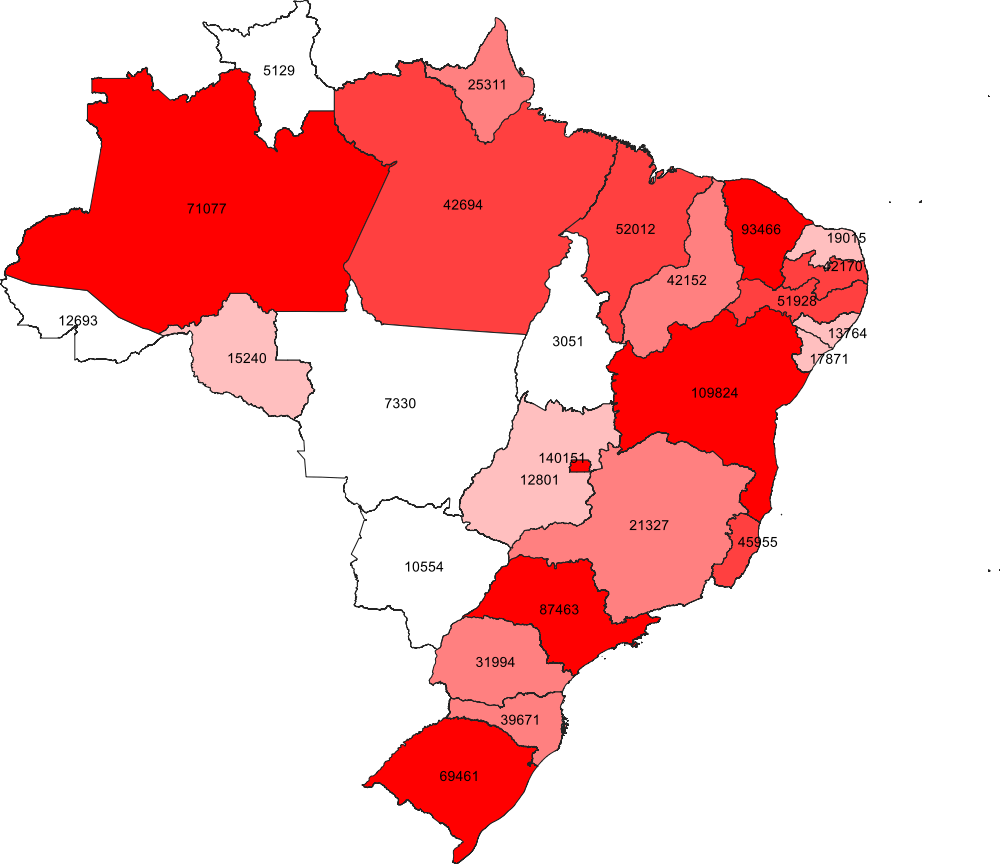

In [13]:
from qgis.utils import iface


label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "casosBrasil_tests"


text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setEnabled(False)
text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()

vlayer = QgsProject.instance().mapLayersByName('Brasil')[0]

xt = vlayer.extent()
# print(xt)
width  = 1000
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('fig/brasilTe-color.png',"PNG")
Image( imgbuf.data() )

## Number of deaths by color

In [19]:
vectorLyr=QgsVectorLayer("C:/OSGeo4W64/bin/Andre/Covid-19Brazil/Tables/ShapesBrazil/lml_unidade_federacao_a.shp","Brasil","ogr")
vectorLyr.isValid()

uri='file:///C:/OSGeo4W64/bin/Andre/Covid-19Brazil/Tables/cases-brazil-total.csv?delimiter=,'
infoLyr=QgsVectorLayer(uri,'casosBrasil','delimitedtext')
infoLyr.isValid()

QgsProject.instance().addMapLayer(vectorLyr)
QgsProject.instance().addMapLayer(infoLyr)
csvField='state'
shpField='sigla'

joinObject=QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)
joinObject.setJoinLayerId(infoLyr.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(infoLyr)
vectorLyr.addJoin(joinObject)

vlayer = QgsProject.instance().mapLayersByName('Brasil')[0]

for field in vlayer.fields():
    print("Column "+field.name()+" Load")

from qgis.utils import iface


label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "casosBrasil_deaths"


text_format = QgsTextFormat()
background_color = QgsTextBackgroundSettings()

background_color.setEnabled(False)
text_format.setBackground(background_color )
label_settings.setFormat(text_format)

vlayer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()


from qgis.PyQt import QtGui

myVectorLayer = QgsProject.instance().mapLayersByName('Brasil')[0]

myTargetField = 'casosBrasil_deaths'
myRangeList = []
myOpacity = 1
# Make our first symbol and range...
myMin = 0
myMax = 134.0
myLabel = 'Group 1'
myColour = QtGui.QColor('#ffffff')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = 134.1
myMax = 165.0
myLabel = 'Group 2'
myColour = QtGui.QColor('#ffbfbf')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = 165.1
myMax = 303.0
myLabel = 'Group 3'
myColour = QtGui.QColor('#ff8080')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#aaaaaaaaaaaahh
myMin = 303.0
myMax = 1795.0
myLabel = 'Group 4'
myColour = QtGui.QColor('#ff4040')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

#............
myMin = 1795.1
myMax = 1000000.0
myLabel = 'Group 5'
myColour = QtGui.QColor('#ff0000')
mySymbol5 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol5.setColor(myColour)
mySymbol5.setOpacity(myOpacity)
myRange5 = QgsRendererRange(myMin, myMax, mySymbol5, myLabel)
myRangeList.append(myRange5)



myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

myVectorLayer.setRenderer(myRenderer)

Column nome Load
Column geometriaa Load
Column sigla Load
Column geocodigo Load
Column casosBrasil_country Load
Column casosBrasil_totalCases Load
Column casosBrasil_totalCasesMS Load
Column casosBrasil_notConfirmedByMS Load
Column casosBrasil_deaths Load
Column casosBrasil_deathsMS Load
Column casosBrasil_URL Load
Column casosBrasil_deaths_per_100k_inhabitants Load
Column casosBrasil_totalCases_per_100k_inhabitants Load
Column casosBrasil_deaths_by_totalCases Load
Column casosBrasil_recovered Load
Column casosBrasil_suspects Load
Column casosBrasil_tests Load
Column casosBrasil_tests_per_100k_inhabitants Load
Column casosBrasil_date Load
Column casosBrasil_newCases Load
Column casosBrasil_newDeaths Load


Gerar mapa com 1000 por 864


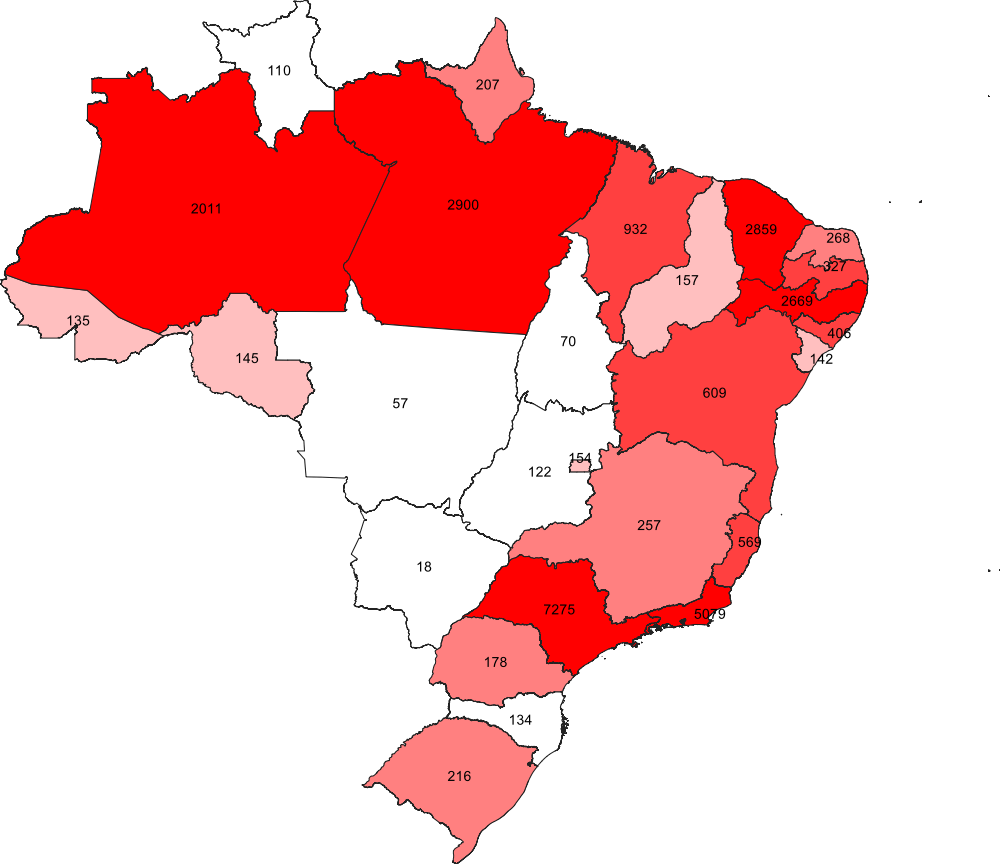

In [20]:
vlayer = QgsProject.instance().mapLayersByName('Brasil')[0]

xt = vlayer.extent()
# print(xt)
width  = 1000
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('fig/brasildeaths-color.png',"PNG")
Image( imgbuf.data() )